In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/Alexander/opt/anaconda3/lib/python3.8/site-packages (0.0)


In [2]:
# This will be used to save the model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans


# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("../../Resources/AprilUpdate/tracks_genrePotential.csv")
df

,id_artists,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,['5LiOoJbxVSAMkBS2fUm3X2'],07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
1,['5LiOoJbxVSAMkBS2fUm3X2'],08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
2,['3BiJGZsyX9sJchTqcSA7Su'],08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
3,['3BiJGZsyX9sJchTqcSA7Su'],0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
4,['4AxgXfD7ISvJSTObqm4aIE'],0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549246,['1QLBXKM5GCpyQQSVMNZqrZ'],5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
549247,['1dy5WNgIKQU6ezkpZs4y8z'],0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
549248,['37M5pPGs6V1fchFJSgCguX'],27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
549249,"['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [5]:

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,id_artists,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,['5LiOoJbxVSAMkBS2fUm3X2'],07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
1,['5LiOoJbxVSAMkBS2fUm3X2'],08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
2,['3BiJGZsyX9sJchTqcSA7Su'],08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
3,['3BiJGZsyX9sJchTqcSA7Su'],0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
4,['4AxgXfD7ISvJSTObqm4aIE'],0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549246,['1QLBXKM5GCpyQQSVMNZqrZ'],5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
549247,['1dy5WNgIKQU6ezkpZs4y8z'],0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
549248,['37M5pPGs6V1fchFJSgCguX'],27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
549249,"['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [6]:

null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [7]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

bins = [1920,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019,2029]
group_names = ["1920s", "1930s", "1940s", "1950s", "1960s","1970s","1980s","1990s","2000s","2010s","2020s"]
df["era"] = pd.cut(df["year"], bins, labels=group_names, include_lowest=True)
df


,id_artists,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,era
0,['5LiOoJbxVSAMkBS2fUm3X2'],07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,...,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922,1920s
1,['5LiOoJbxVSAMkBS2fUm3X2'],08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,...,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922,1920s
2,['3BiJGZsyX9sJchTqcSA7Su'],08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],1922,0.402,0.1580,...,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1922,1920s
3,['3BiJGZsyX9sJchTqcSA7Su'],0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],1922,0.227,0.2610,...,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4,1922,1920s
4,['4AxgXfD7ISvJSTObqm4aIE'],0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],1922,0.563,0.1840,...,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3,1922,1920s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549246,['1QLBXKM5GCpyQQSVMNZqrZ'],5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],2020-09-26,0.560,0.5180,...,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2020,2020s
549247,['1dy5WNgIKQU6ezkpZs4y8z'],0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],2020-10-21,0.765,0.6630,...,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2020,2020s
549248,['37M5pPGs6V1fchFJSgCguX'],27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],2020-09-02,0.535,0.3140,...,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,2020,2020s
549249,"['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']",2021-03-05,0.696,0.6150,...,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2021,2020s


In [8]:
# df = df.loc[df['popularity']>15]
# df.groupby('era').count()


In [9]:
df = df.drop(['id_artists','id','name','release_date','artists','year','popularity','time_signature', 'era','mode','key','explicit'], axis=1)

# df = df.loc[df['year'] != 1920 ]
# df = df.loc[df['year'] != 1921 ]
df

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,181640,0.434,0.1770,-21.180,0.0512,0.994,0.021800,0.2120,0.4570,130.418
1,176907,0.321,0.0946,-27.961,0.0504,0.995,0.918000,0.1040,0.3970,169.980
2,163080,0.402,0.1580,-16.900,0.0390,0.989,0.130000,0.3110,0.1960,103.220
3,178933,0.227,0.2610,-12.343,0.0382,0.994,0.247000,0.0977,0.0539,118.891
4,161427,0.563,0.1840,-13.757,0.0512,0.993,0.000016,0.3250,0.6540,133.088
...,...,...,...,...,...,...,...,...,...,...
549246,258267,0.560,0.5180,-7.471,0.0292,0.785,0.000000,0.0648,0.2110,131.896
549247,153293,0.765,0.6630,-5.223,0.0652,0.141,0.000297,0.0924,0.6860,150.091
549248,187601,0.535,0.3140,-12.823,0.0408,0.895,0.000150,0.0874,0.0663,145.095
549249,142003,0.696,0.6150,-6.212,0.0345,0.206,0.000003,0.3050,0.4380,90.029


## Elbow Method

In [10]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

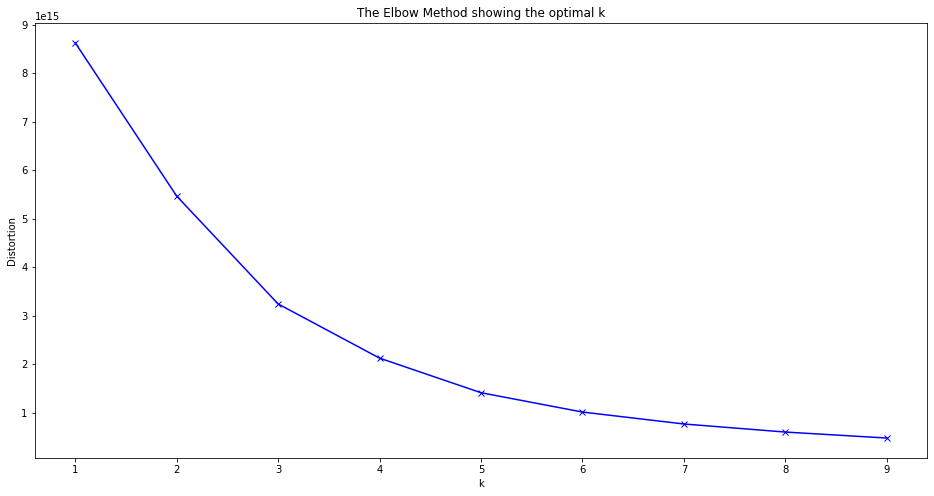

In [11]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig("1-10elbow.png")
plt.show()

In [88]:

null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()


era    1
dtype: int64

In [89]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.count()

explicit            549179
danceability        549179
energy              549179
key                 549179
loudness            549179
mode                549179
speechiness         549179
acousticness        549179
instrumentalness    549179
liveness            549179
valence             549179
tempo               549179
time_signature      549179
era                 549179
dtype: int64

In [90]:
df = df.loc[df['era']!='2020s']

df

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,era
0,0,0.434,0.1770,1,-21.180,1,0.0512,0.9940,0.021800,0.2120,0.4570,130.418,5,1920s
1,0,0.321,0.0946,7,-27.961,1,0.0504,0.9950,0.918000,0.1040,0.3970,169.980,3,1920s
2,0,0.402,0.1580,3,-16.900,0,0.0390,0.9890,0.130000,0.3110,0.1960,103.220,4,1920s
3,0,0.227,0.2610,5,-12.343,1,0.0382,0.9940,0.247000,0.0977,0.0539,118.891,4,1920s
4,0,0.563,0.1840,4,-13.757,1,0.0512,0.9930,0.000016,0.3250,0.6540,133.088,3,1920s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549220,0,0.404,0.0251,9,-29.059,1,0.0413,0.9930,0.960000,0.1080,0.5320,98.777,4,2010s
549224,0,0.616,0.4690,0,-7.380,1,0.0270,0.0167,0.000000,0.1110,0.2330,135.035,4,2010s
549225,0,0.674,0.5680,1,-6.356,1,0.0408,0.1160,0.000000,0.1650,0.6400,166.107,4,2010s
549226,0,0.269,0.3680,10,-10.436,1,0.0339,0.7240,0.000003,0.1110,0.3370,168.803,4,2010s


In [91]:
df.to_csv("song_eras_ml-no2020s.csv", index = False)

# Select your features (columns)

In [14]:
column_names = df.columns
column_names = column_names.tolist()
column_names.remove('era')
# column_names.remove('id')
# column_names.remove('name')
# column_names.remove('release_date')
# column_names.remove('artists')
column_names

['explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [15]:
y = df['era']
y

0         1920s
1         1920s
2         1920s
3         1920s
4         1920s
          ...  
549246    2020s
549247    2020s
549248    2020s
549249    2020s
549250    2010s
Name: era, Length: 549179, dtype: category
Categories (11, object): [1920s < 1930s < 1940s < 1950s ... 1990s < 2000s < 2010s < 2020s]

In [16]:
# Set features. This will also be used as your x values.
selected_features = df[column_names]
selected_features

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
1,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
2,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
3,0,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
4,0,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549246,0,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
549247,0,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
549248,0,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
549249,0,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


# Create a Train Test Split


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=18)

In [18]:
X_train.head()

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
107668,0,0.172,0.0571,8,-36.058,0,0.0419,0.9630,0.898000,0.2940,0.133,115.773,4
343175,0,0.384,0.4710,5,-7.878,0,0.0599,0.9830,0.028600,0.2450,0.829,192.380,4
196650,0,0.588,0.9250,0,-5.584,1,0.1600,0.0897,0.000005,0.0881,0.759,99.830,4
165613,0,0.559,0.3950,3,-8.864,1,0.1720,0.8630,0.165000,0.6580,0.554,136.020,4
292247,0,0.689,0.6790,0,-6.499,1,0.0570,0.2790,0.000000,0.1060,0.613,90.034,4


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [19]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

# Create a StandardScater model and fit it to the training data

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)

In [21]:
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 0.9956322653951113
Testing Data Score: 0.4025492552532867


In [112]:
sorted(zip(rf.feature_importances_, column_names), reverse=True)

[(0.12450083547508915, 'popularity'),
 (0.11106490186181611, 'loudness'),
 (0.1020788889951911, 'acousticness'),
 (0.09008999868796827, 'energy'),
 (0.08765051931744083, 'valence'),
 (0.08732226663620768, 'danceability'),
 (0.08724448021913354, 'speechiness'),
 (0.08378032163594121, 'tempo'),
 (0.08017771405518813, 'liveness'),
 (0.06534745221063652, 'instrumentalness'),
 (0.051780674424593984, 'key'),
 (0.013537713678765943, 'mode'),
 (0.01025782288744325, 'time_signature'),
 (0.00516640991458429, 'explicit')]

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [114]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [250, 300, 350],
              'max_depth': [125, 150, 175]}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [115]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=125, n_estimators=250 .................................
[CV] ..... max_depth=125, n_estimators=250, score=0.442, total= 4.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.3min remaining:    0.0s


[CV] max_depth=125, n_estimators=250 .................................
[CV] ..... max_depth=125, n_estimators=250, score=0.438, total= 4.3min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  8.6min remaining:    0.0s


[CV] max_depth=125, n_estimators=250 .................................


KeyboardInterrupt: 

In [125]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 150, 'n_estimators': 350}
0.9649268119597787


In [126]:
# Training score:
grid.score(X_train_scaled, y_train)

0.9999846641055723

In [127]:
# Testing score:
grid.score(X_test_scaled, y_test)

0.9653562144878195

In [128]:
# Make prediction and save to variable for report.
predictions = grid.predict(X_test_scaled)

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     40528
           1       0.85      0.60      0.70      2943

    accuracy                           0.97     43471
   macro avg       0.91      0.79      0.84     43471
weighted avg       0.96      0.97      0.96     43471



In [ ]:
#       precision    recall  f1-score   support   (with 20-21)

#            0       0.97      0.99      0.98     40603
#            1       0.86      0.60      0.71      2995

#     accuracy                           0.97     43598
#    macro avg       0.92      0.80      0.84     43598
# weighted avg       0.96      0.97      0.96     43598

# Save the Model

In [44]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'explicit_rf.sav'
joblib.dump(rf, filename)

['explicit_rf.sav']